# Ejercicios Pair Programming 
## Lección 16 - Regresión Logística Métricas

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Cargamos los dataframe estandarizados y codificados, y sin estandarizar y codificados.
df = pd.read_csv("resultados_estudiantes_estandarizados_codificados.csv", index_col=0)
df_sin = pd.read_csv("resultados_estudiantes_sin_estandarizar_codificados.csv", index_col=0)

In [5]:
df.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,0.0,4,1,0.374672,0.170737,0.375773,0.0,1.0,0.0,0.0,0.0,0,1
1,0.0,3,0,0.166770,1.450511,1.336613,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,5,1,1.622085,1.806004,1.679770,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,2,1,-1.357846,-0.895741,-1.683170,1.0,0.0,0.0,0.0,0.0,1,0
4,1.0,3,1,0.651875,0.597329,0.444404,0.0,0.0,1.0,0.0,0.0,0,1


In [6]:
df_sin.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,0.0,4,1,72.0,72.0,74.0,0.0,1.0,0.0,0.0,0.0,0,1
1,0.0,3,0,69.0,90.0,88.0,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,5,1,90.0,95.0,93.0,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,2,1,47.0,57.0,44.0,1.0,0.0,0.0,0.0,0.0,1,0
4,1.0,3,1,76.0,78.0,75.0,0.0,0.0,1.0,0.0,0.0,0,1


Calculad las métricas para vuestro modelo

### Dataframe Estandarizado y Codificado

In [4]:
# Separamos los datos en X e y.

X = df.drop("gender", axis = 1)
y = df["gender"]

In [7]:
# Separamos en train y test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
# Ajustamos la prediccion del modelo.

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train,y_train)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test)

### Dataframe Sin Estandarizar y Codificado

In [9]:
# Separamos los datos en X e y.

X1 = df_sin.drop("gender", axis = 1)
y1 = df_sin["gender"]

In [10]:
# Separamos en train y test.
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [11]:
# Ajustamos la prediccion del modelo.

log_reg_sin = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_sin.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_sin = log_reg_sin.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_sin = log_reg_sin.predict(x_test1)

Nuestra variable respuesta está dividida en dos valores únicos (hombres y mujeres). En nuestro caso lo que queremos saber es el número de mujeres, por tanto nos importa más el recall que precision ya que éste nos da el porcentaje de mujeres capturadas tanto positivas como negativas (entendiendo que el valor 0 de nuestra matriz de confusión es el valor positivo y corresponde a las mujeres).

Ahora procedemos a realizar las métricas tanto para el dataframe estandarizado - codificado y sin estandarizar - codificado y ver el resultado que nos aparece para comprobar si nuestro modelo es bueno o no.

### Metricas para Datos Estandarizados y Codificados

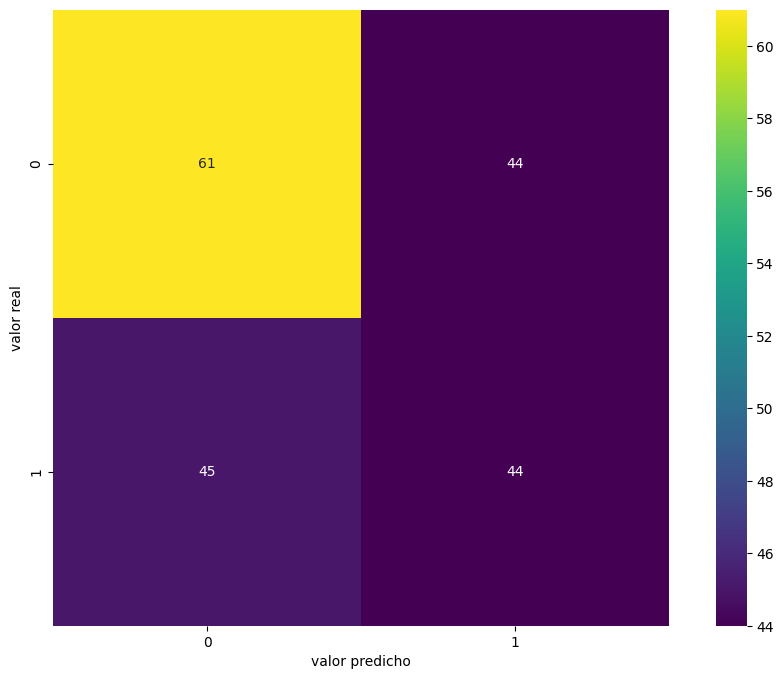

In [12]:
mat_lr_esta = confusion_matrix(y_test, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [13]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [14]:
results_logistic_esta = metricas(y_test, y_pred_test_esta, y_train, y_pred_train_esta, "Regresión logistica Estandarizados")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.541237,0.500000,0.494382,0.497175,0.075399,test,Regresión logistica Estandarizados
1,0.541344,0.538244,0.497382,0.517007,0.081645,train,Regresión logistica Estandarizados


Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

Analizando los datos del test: 

- Accuracy: nuestro modelo acierta el 54% de la veces. No lo consideramos muy fiable.

- Precision: tenemos un valor de 0.5. Confirma que nuestro modelo se equivocará la mitad de la veces que prediga si es hombre o mujer.

- Recall: tenemos un valor de 0.49. Es capaz de identificar un 49% del sexo femenino.

- F1: tenemos que tener en cuenta que a menor f1 menos falsos (tanto negativos como positivos) hay en nuestro conjunto de datos. El valor que obtenemos es 0.49, por lo que no es muy fiable nuestro modelo ya que la mitad corresponde a falsos negativos y positivos.

- kappa tenemos un valor de 0.07. La concordancia de nuestros datos es menor que insignificante, es decir, nuestro modelo no tiene concordancia. 

Con esto podemos ver que nuestro modelo no funciona con estos datos estandarizados y codificados según hemos decidido. Vamos a probar ahora con los datos sin estandarizar y codificados.


### Métricas para Datos sin Estandarizar y Codificados

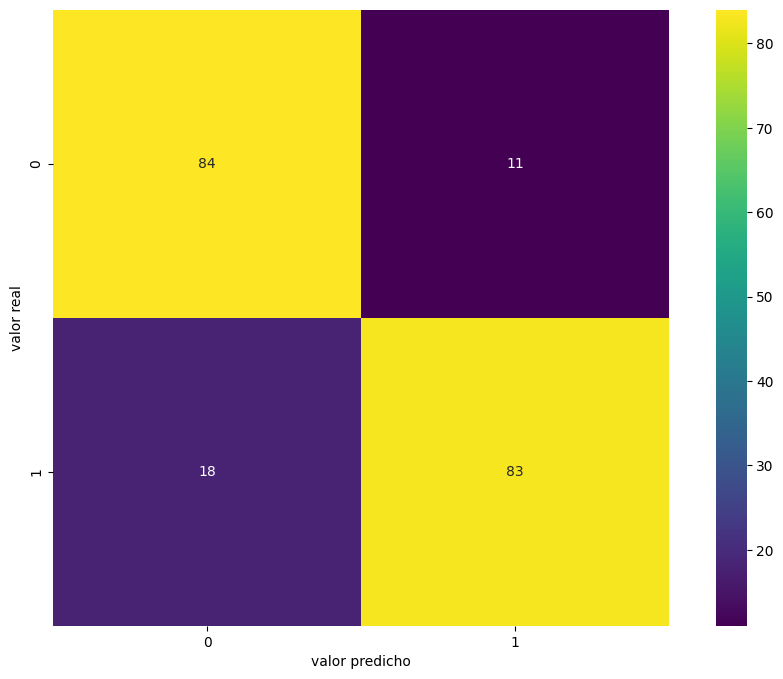

In [15]:
mat_lr_sin = confusion_matrix(y_test1, y_pred_test_sin)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_sin, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [16]:
results_logistic_sin = metricas(y_test1, y_pred_test_sin, y_train1, y_pred_train_sin, "Regresión logistica Sin Estandarizar")
results_logistic_sin

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852041,0.882979,0.821782,0.851282,0.704451,test,Regresión logistica Sin Estandarizar
1,0.905371,0.905660,0.896000,0.900804,0.810345,train,Regresión logistica Sin Estandarizar


Analizando los datos del test: 

- Accuracy: nuestro modelo acierta el 85% de la veces. Lo consideramos bastante fiable.

- Precision: tenemos un valor de 0.88. Confirma que nuestro modelo se equivocará el 12% que prediga si es mujer.

- Recall: tenemos un valor de 0.82. Es capaz de identificar un 82% del sexo femenino.

- F1: tenemos que tener en cuenta que a menor f1 menos falsos (tanto negativos como positivos) hay en nuestro conjunto de datos. El valor que obtenemos es 0.85, por lo que es muy fiable nuestro modelo ya que tan solo el 15% de nuestros datos son falsos positivos y negativos.

- kappa tenemos un valor de 0.70. La concordancia de nuestros datos es buena, es decir, nuestros datos tienen buena concordancia.

Con esto podemos ver que nuestro modelo funciona con estos datos sin estandarizar y codificados según hemos decidido. También podemos apreciar que no hay overfitting ni underfitting ya que las métricas entre train y el test son similares. 

Como conclusión a este estudio de comparación de métricas entre distintos dataframes nos soprende la diferencia de fiabilidad al haber estandarizado o no nuestros datos. Esto puede darse porque los outliers que manipulamos a la hora de estandarizar afectan a los valores de las notas que estamos estudiando. Podríamos haber elegido el modelo Robust Scaler que tiene en cuenta los outliers como posible mejora en nuestro estudio de modelo de regresión logística con datos estandarizados.

En el caso de los datos sin estandarizar vemos que nos da muy buenos resultados. Los resultados son mejores y a la vez más fiables porque no hemos modificado los datos originales. 

Viendo los resultados obtenidos consideramos que Decision Tree y Random Forest los haremos ya directamente con los datos sin estandarizar.

In [17]:
# Guardamos los resultados obtenidos de las diferentes métricas en dos csv:

results_logistic_sin.to_csv("resultados_estudiantes_sin_estandarizar_codificados_metricas.csv")
results_logistic_esta.to_csv("resultados_estudiantes_estandarizados_codificados_metricas.csv")

Happy coding 📊📈📉